### This notebook Covers Step 2: Model Selection and Training

**Model Selection and Training**: Identify a suitable machine learning algorithm for this classification task. Explore different algorithms and choose the one that seems most promising. Using the selected algorithm, train the spam filter

### (1) Decision Tree on BOW data

In [32]:
# Import required packages

import scipy.io
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [3]:
# Load the dataset for training
train_bow = scipy.io.loadmat('datasets/top_nk_train.mat')
X_train_bow = train_bow['X']
X_train_bow = X_train_bow.toarray()
X_train_bow = pd.DataFrame(X_train_bow)
# X_train_bow.shape # (8000, 10000)

Y_train_bow = train_bow['Y']
Y_train_bow = Y_train_bow.toarray()
Y_train_bow = pd.DataFrame(Y_train_bow)
Y_train_bow.shape #(8000, 1)


(8000, 1)

In [55]:
#Find best parameters

# Initialize classifier
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define Hyperparameters
hyperparameters = {
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 10, 20, 30, 40, 50],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]
                   }

grid_search = GridSearchCV(estimator=dt_clf, param_grid=hyperparameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_bow, Y_train_bow)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [56]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [4]:
best_params = {'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [5]:
dt_clf_best = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=42)
dt_clf_best.fit(X_train_bow, Y_train_bow)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, random_state=42)

#### Evaluate on Training Data

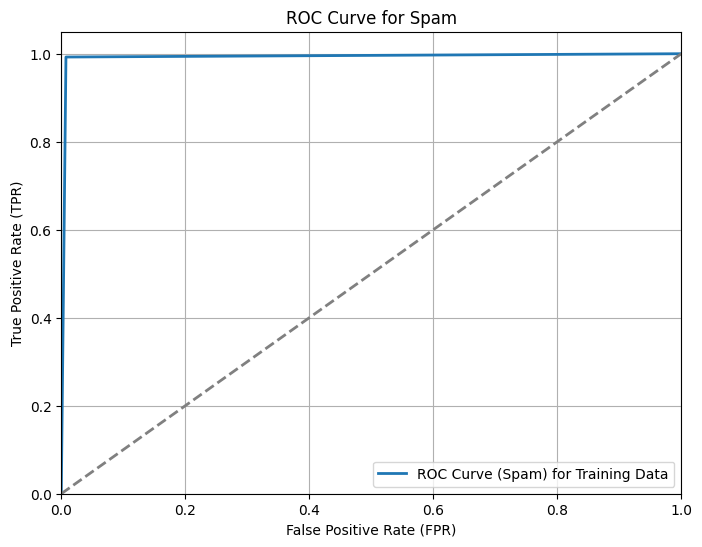

Number of emails classified as Spam, that are actually non-spam: 
0.7528230865746549% emails


In [17]:
# Set a Threshold to classify an email as Spam

pred_probs_train = dt_clf_best.predict_proba(X_train_bow)
threshold = 0.5 # No difference till 0.97
pred_prob_threshold = []

for i in range(len(pred_probs_train)):
    if pred_probs_train[i][1] > threshold:
        pred_prob_threshold.append(1)
    else:
        pred_prob_threshold.append(-1)


# Calculate ROC curve for class +1 (Spam)
fpr_spam, tpr_spam, _ = roc_curve(Y_train_bow, pred_prob_threshold, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_spam, tpr_spam, lw=2, label='ROC Curve (Spam) for Training Data')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Spam')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# False Positive rate for this ROC gives the number of emails that are legitimate, but classified as spam
print("Number of emails classified as Spam, that are actually non-spam: ")
print(str(fpr_spam[1]*100) + "% emails")

#### Evaluate on Test Data

In [15]:
# Evaluate on test data

# Load the dataset for evaluation
test_bow = scipy.io.loadmat('datasets/top_nk_test.mat')
X_test_bow = test_bow['X']
X_test_bow = X_test_bow.toarray()
X_test_bow = pd.DataFrame(X_test_bow)
# X_test_bow.shape # (2000, 10000)

Y_test_bow = test_bow['Y']
Y_test_bow = Y_test_bow.toarray()
Y_test_bow = pd.DataFrame(Y_test_bow)
Y_test_bow.shape #(2000, 1)

(2000, 1)

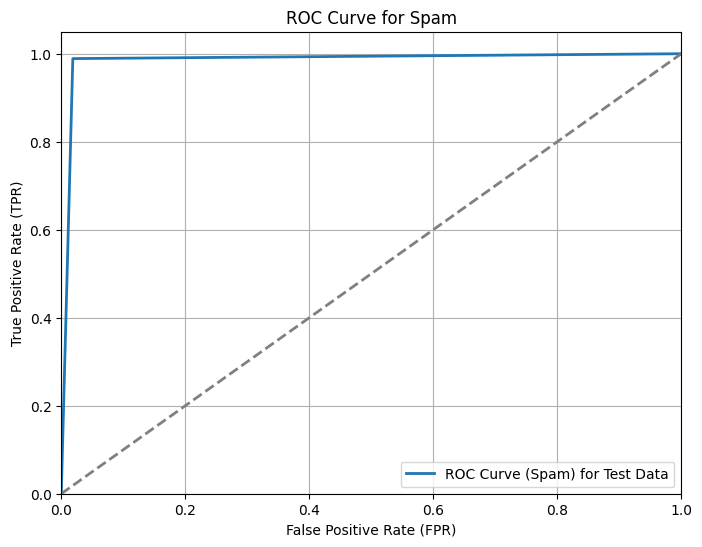

Number of emails classified as Spam, that are actually non-spam: 
1.8617021276595744% emails
AUC-ROC score: 0.9851496174405199


In [36]:
pred_probs_test = dt_clf_best.predict_proba(X_test_bow)
threshold = 0.5 # No difference till 0.97
pred_prob_threshold = []

for i in range(len(pred_probs_test)):
    if pred_probs_test[i][1] > threshold:
        pred_prob_threshold.append(1)
    else:
        pred_prob_threshold.append(-1)

# Calculate ROC curve for class +1 (Spam)
fpr_spam, tpr_spam, _ = roc_curve(Y_test_bow, pred_prob_threshold, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_spam, tpr_spam, lw=2, label='ROC Curve (Spam) for Test Data')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Spam')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Number of emails classified as Spam, that are actually non-spam: ")
print(str(fpr_spam[1]*100) + "% emails")

score = roc_auc_score(Y_test_bow, pred_prob_threshold)
print("AUC-ROC score: " + str(score))

### (2) Decision Tree on TF-IDF data

In [23]:
# Load the dataset for training
train_bow = scipy.io.loadmat('datasets/train_df.mat')
X_train_bow = train_bow['X']
X_train_bow = X_train_bow.toarray()
X_train_bow = pd.DataFrame(X_train_bow)
# X_train_bow.shape # (8000, 5000)

Y_train_bow = train_bow['Y']
Y_train_bow = Y_train_bow.toarray()
Y_train_bow = pd.DataFrame(Y_train_bow)
Y_train_bow.shape #(8000, 1)


(8000, 1)

In [24]:
#Find best parameters

# Initialize classifier
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define Hyperparameters
hyperparameters = {
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 10, 20, 30, 40, 50],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]
                   }

grid_search = GridSearchCV(estimator=dt_clf, param_grid=hyperparameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_bow, Y_train_bow)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [25]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [26]:
dt_clf_best = DecisionTreeClassifier(**best_params, class_weight='balanced', random_state=42)
dt_clf_best.fit(X_train_bow, Y_train_bow)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, random_state=42)

#### Evaluate on Training Data

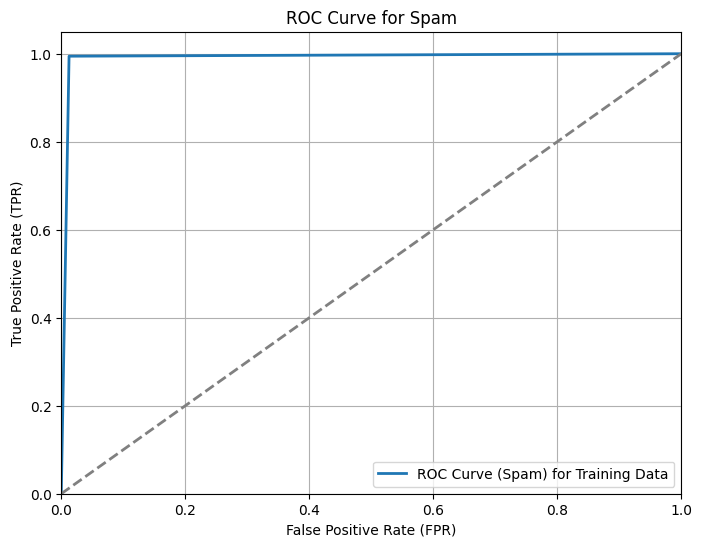

Number of emails classified as Spam, that are actually non-spam: 
1.2547051442910917% emails


In [37]:
# Set a Threshold to classify an email as Spam

pred_probs_train = dt_clf_best.predict_proba(X_train_bow)
threshold = 0.5 # No difference till 0.97
pred_prob_threshold = []

for i in range(len(pred_probs_train)):
    if pred_probs_train[i][1] > threshold:
        pred_prob_threshold.append(1)
    else:
        pred_prob_threshold.append(-1)


# Calculate ROC curve for class +1 (Spam)
fpr_spam, tpr_spam, _ = roc_curve(Y_train_bow, pred_prob_threshold, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_spam, tpr_spam, lw=2, label='ROC Curve (Spam) for Training Data')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Spam')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# False Positive rate for this ROC gives the number of emails that are legitimate, but classified as spam
print("Number of emails classified as Spam, that are actually non-spam: ")
print(str(fpr_spam[1]*100) + "% emails")


#### Evaluate on Test Data

In [39]:
# Evaluate on test data

# Load the dataset for evaluation
test_bow = scipy.io.loadmat('datasets/test_df.mat')
X_test_bow = test_bow['X']
X_test_bow = X_test_bow.toarray()
X_test_bow = pd.DataFrame(X_test_bow)
# X_test_bow.shape # (2000, 5000)

Y_test_bow = test_bow['Y']
Y_test_bow = Y_test_bow.toarray()
Y_test_bow = pd.DataFrame(Y_test_bow)
Y_test_bow.shape #(2000, 1)

(2000, 1)

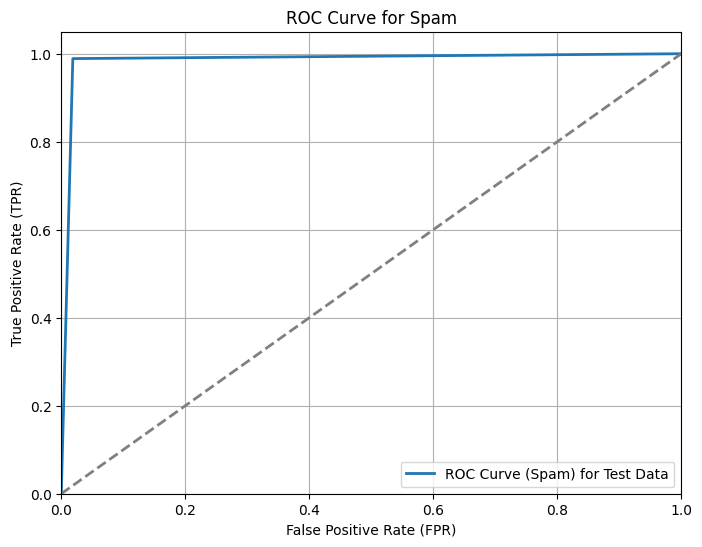

Number of emails classified as Spam, that are actually non-spam: 
1.8617021276595744% emails
AUC-ROC score: 0.9851496174405199


In [35]:
pred_probs_test = dt_clf_best.predict_proba(X_test_bow)
threshold = 0.5 # No difference till 0.97
pred_prob_threshold = []

for i in range(len(pred_probs_test)):
    if pred_probs_test[i][1] > threshold:
        pred_prob_threshold.append(1)
    else:
        pred_prob_threshold.append(-1)

# Calculate ROC curve for class +1 (Spam)
fpr_spam, tpr_spam, _ = roc_curve(Y_test_bow, pred_prob_threshold, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_spam, tpr_spam, lw=2, label='ROC Curve (Spam) for Test Data')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Spam')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Number of emails classified as Spam, that are actually non-spam: ")
print(str(fpr_spam[1]*100) + "% emails")


score = roc_auc_score(Y_test_bow, pred_prob_threshold)
print("AUC-ROC score: " + str(score))